In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config
set_config(display='diagram')


import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore")


In [201]:
df = pd.read_csv('Titanic-Dataset.csv')
df.sample(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S


In [203]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
df.drop(columns=['Cabin'],inplace=True)

In [209]:
df['Embarked'].fillna('S', inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Wypełnianie brakujących wartości w Age na podstawie Pclass jest sensowne, ponieważ Pclass (klasa pasażera) ma silną korelację z wiekiem. Wysoka klasa pasażera (Pclass=1) może być związana ze starszymi osobami, podczas gdy niższa klasa (Pclass=3) częściej zawiera młodsze osoby. Wypełniając brakujące wartości średnią (lub medianą) w obrębie każdej klasy, uwzględniamy tę zależność, co prowadzi do bardziej realistycznych danych i lepszego modelowania.

In [212]:
df.corr(numeric_only=True)['Age'].abs()

PassengerId    0.036847
Survived       0.077221
Pclass         0.369226
Age            1.000000
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Name: Age, dtype: float64

In [214]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [216]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Ekstrakcja tytulow z imion


In [219]:
df['Title']=df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [220]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [223]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [224]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [227]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,S,Mr,1
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,21.5,0,0,330919,7.8292,Q,Miss,1
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,25.0,0,0,A/5 2466,8.0500,S,Mr,1
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S,Miss,2
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S,Miss,5
839,840,1,1,"Marechal, Mr. Pierre",male,40.0,0,0,11774,29.7000,C,Mr,1
410,411,0,3,"Sdycoff, Mr. Todor",male,25.0,0,0,349222,7.8958,S,Mr,1
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,S,Miss,1
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S,Mr,1
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,S,Mrs,2


In [228]:
df.drop(columns=['Name', 'Parch', 'SibSp', 'Ticket'], inplace=True)

In [231]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
120,121,0,2,male,21.0,73.5000,S,Mr,3
157,158,0,3,male,30.0,8.0500,S,Mr,1
871,872,1,1,female,47.0,52.5542,S,Mrs,3
140,141,0,3,female,21.5,15.2458,C,Mrs,3
404,405,0,3,female,20.0,8.6625,S,Miss,1
542,543,0,3,female,11.0,31.2750,S,Miss,7
130,131,0,3,male,33.0,7.8958,C,Mr,1
361,362,0,2,male,29.0,27.7208,C,Mr,2
458,459,1,2,female,50.0,10.5000,S,Miss,1
224,225,1,1,male,38.0,90.0000,S,Mr,2


In [233]:
def family_size(number):
    if number == 1:
        return 'Alone'
    elif number > 1 and number < 5 :
        return 'Small'
    else:
        return 'Large'

In [235]:
df['Family_size'] = df['Family_size'].apply(family_size)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Title        891 non-null    object 
 8   Family_size  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [239]:
df['Age'] = df['Age'].astype('int64')

In [241]:
cols=['Embarked', 'Pclass', 'Sex', 'Title', 'Family_size']
for i in cols:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*20, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
-------------------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
-------------------- 



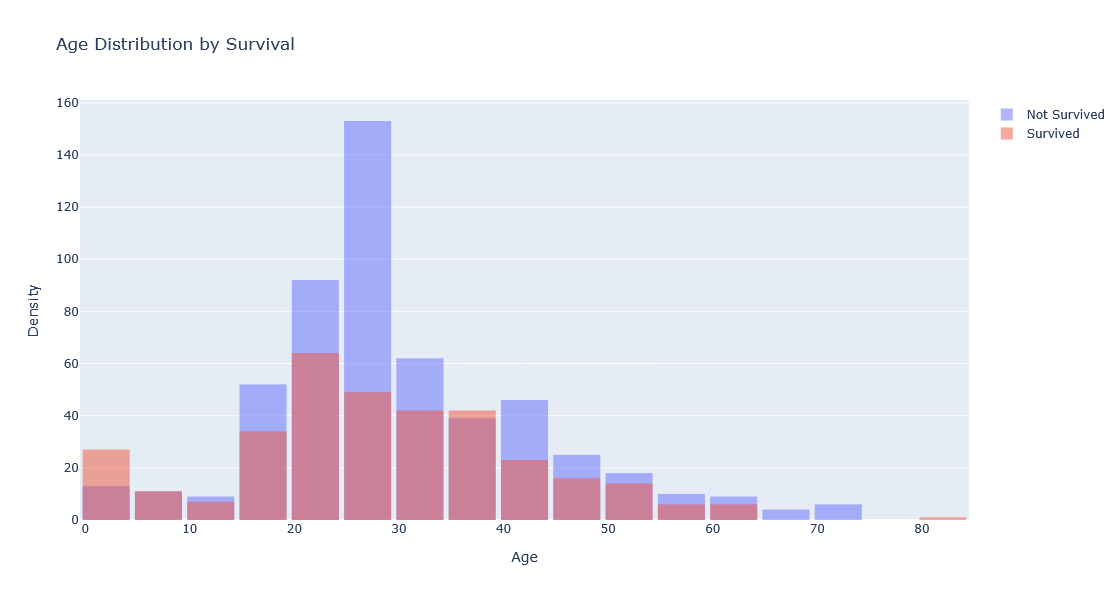

In [303]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Age'], name='Survived', opacity=0.5))
fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
     width=1000,
    height=600
)
fig.show()

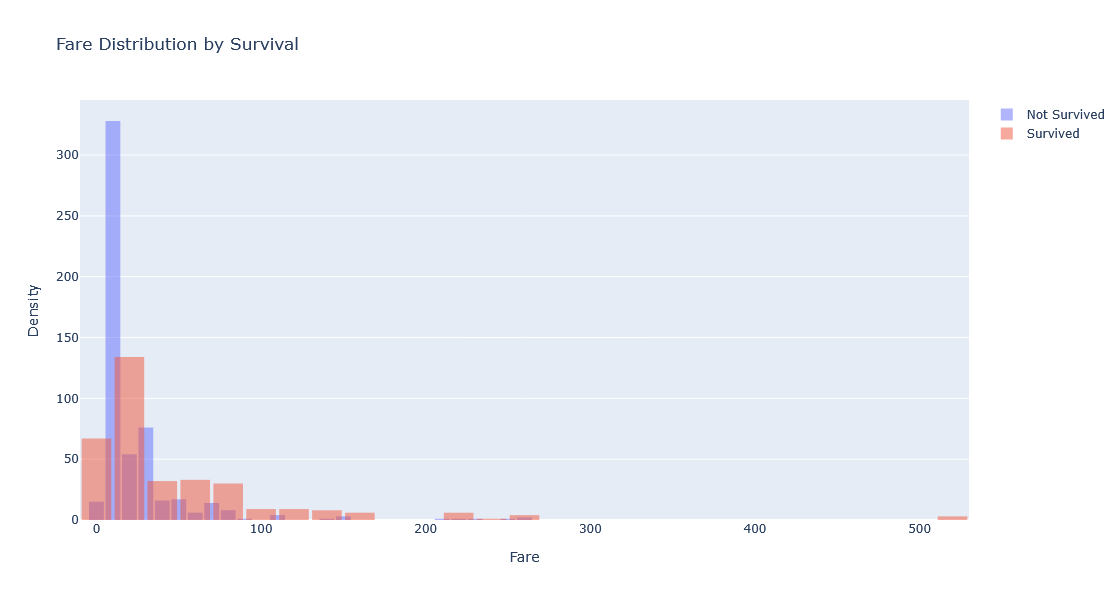

In [301]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))
fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
    width=1000,
    height=600
)
fig.show()

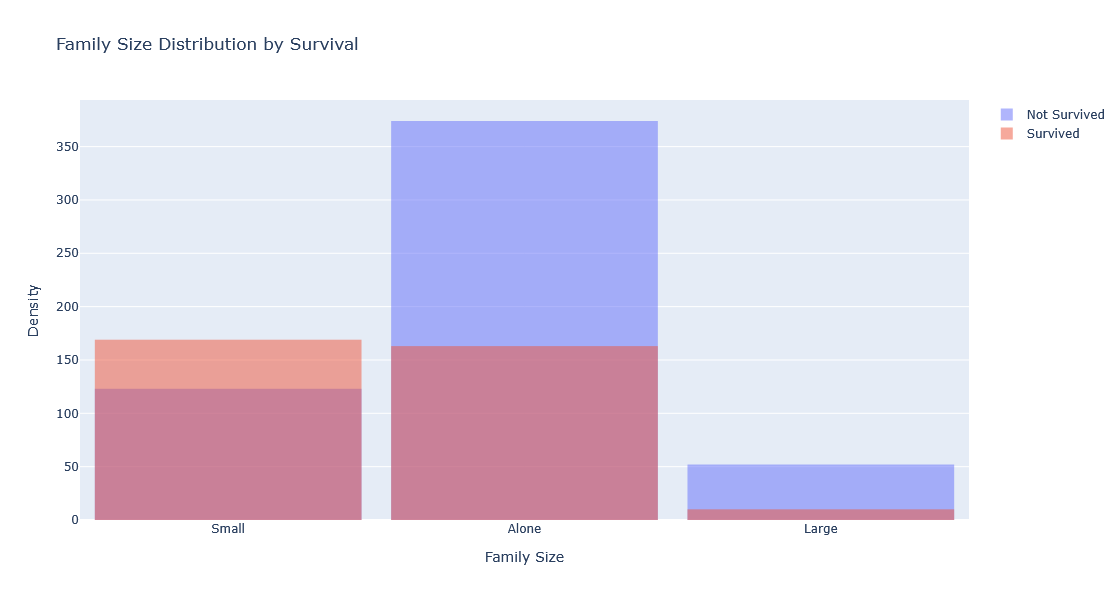

In [297]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))
fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
    width=1000,
    height=600
)

fig.show()



In [248]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,1,0,3,male,22,7.2500,S,Mr,Small
1,2,1,1,female,38,71.2833,C,Mrs,Small
2,3,1,3,female,26,7.9250,S,Miss,Alone
3,4,1,1,female,35,53.1000,S,Mrs,Small
4,5,0,3,male,35,8.0500,S,Mr,Alone


In [249]:
df.head()
df.shape

(891, 9)

In [250]:
num_features = ['Age', 'Fare', 'Family_size']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']
num_cat_transformation = ColumnTransformer([
    ('scaling', MinMaxScaler(), ['Age', 'Fare']),   
    ('onehotencoding1', OneHotEncoder(sparse_output=False), ['Pclass', 'Embarked']),   
    ('ordinal', OrdinalEncoder(), ['Sex']),  
    ('onehotencoding2', OneHotEncoder(sparse_output=False), ['Title', 'Family_size']),   
], remainder='passthrough')

In [254]:
bins = ColumnTransformer([
    ('Kbins', KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile'), [3, 4]),
], remainder='passthrough')


In [256]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_transformation),  # Przekształcanie danych
        ('bins', bins),  # Dyskretyzacja numerycznych zmiennych
        ('classifier', algo)  # Wstawienie klasyfikatora
    ])


In [257]:
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [290]:
def compare_models(X_train, y_train, X_test, y_test):

    results = []

    for model_name, model in classifiers.items():
        print(f"Training model: {model_name}")
        
        # Tworzymy pipeline z odpowiednim klasyfikatorem
        model_pipeline = create_pipeline(model)
        
        # Trenowanie modelu
        model_pipeline.fit(X_train, y_train)
        
        # Predykcja i ocena modelu
        y_pred = model_pipeline.predict(X_test)
        
        # Ocena dokładności
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Dodanie wyników do listy
        results.append({
            'Model': model_name, 
            'Accuracy': accuracy, 
            'Precision': precision, 
            'Recall': recall, 
            'F1-Score': f1
        })

    # Tworzymy DataFrame z wynikami
    results_df = pd.DataFrame(results)
    
    # Zwracamy DataFrame
    return results_df

# Uruchomienie porównania modeli
results_df = compare_models(X_train, y_train, X_test, y_test)

# Wyświetlenie wyników
print(results_df)

Training model: Random Forest
Training model: XGBoost
Training model: Logistic Regression
Training model: SVC
Training model: Gradient Boosting
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.821229   0.776316  0.797297  0.786667
1              XGBoost  0.793296   0.753425  0.743243  0.748299
2  Logistic Regression  0.826816   0.802817  0.770270  0.786207
3                  SVC  0.586592   0.000000  0.000000  0.000000
4    Gradient Boosting  0.821229   0.800000  0.756757  0.777778


In [281]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.821229,0.776316,0.797297,0.786667
1,XGBoost,0.793296,0.753425,0.743243,0.748299
2,Logistic Regression,0.826816,0.802817,0.770270,0.786207
3,SVC,0.586592,0.000000,0.000000,0.000000
4,Gradient Boosting,0.821229,0.800000,0.756757,0.777778


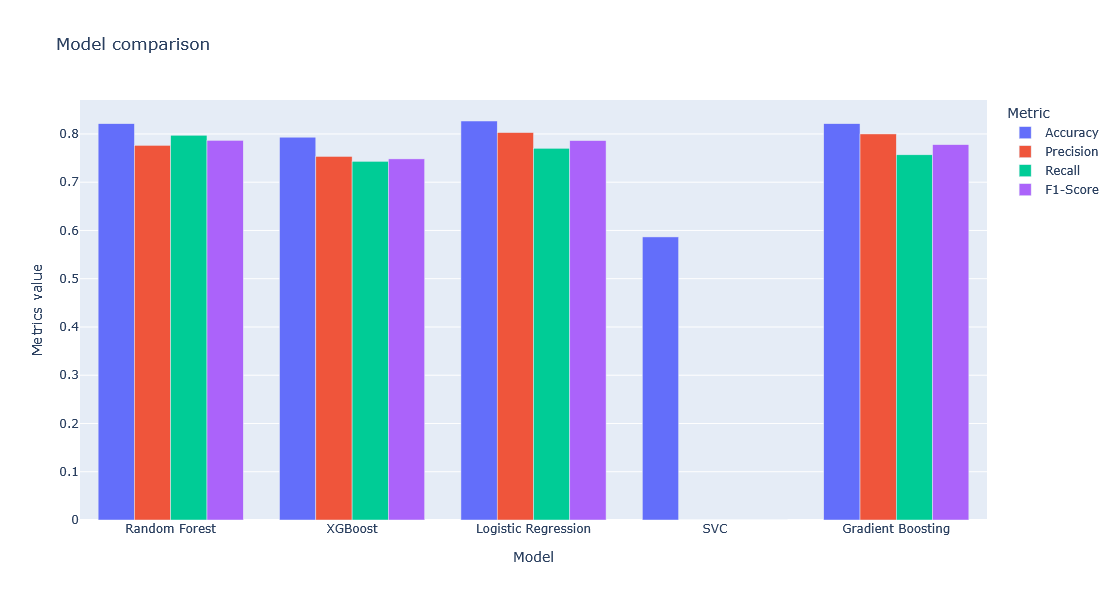

In [292]:
results_df_sorted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                   var_name='Metric',
                                   value_name='Score')
fig=px.bar(results_df_sorted, x='Model', y='Score', color='Metric', barmode='group', title='Model comparison')
fig.update_layout(xaxis_title='Model', yaxis_title='Metrics value', width=1000, height=600)
fig.show()